<div style="line-height:0.5">
<h1 style="color:#FF7C00  ">  TensorBoard trials 1 </h1>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>
    keras.callbacks + rcParams + seaborn.set()
</span>
</div>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams as rcp
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from tensorflow import summary
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Activation, Dropout

<h3 style="color:#FF7C00"> Recap: </h3>
<div style="margin-top: -8px;">
TensorBoard => Visualization tool developed to monitor model architectures, debug, try predictions, and check various metrics such as loss and accuracy. <br>
Once TensorBoard is running, an HTTP address is provided to get access to localhost via browser.
</div>

In [2]:
df = pd.read_csv("./datasets/wisconsin_breast_cancer.csv")
print(df.describe().T)  

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [3]:
print(df.isnull().sum())
#df = df.dropna()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Rename diagnosis column to Label => Targets
df = df.rename(columns={'diagnosis':'Label'})
print(df.dtypes)

id                           int64
Label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
df.head()

,id,Label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='Label', ylabel='count'>

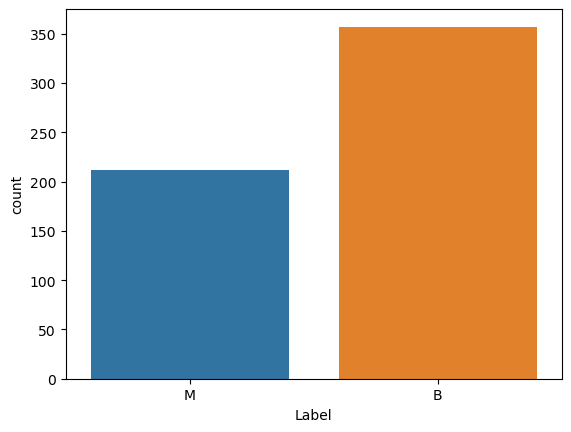

In [7]:
sns.countplot(x="Label", data=df) 

In [8]:
valcounts = df['Label'].value_counts()
# Define the dependent variable to be predicted
y = df["Label"].values
valcounts

B    357
M    212
Name: Label, dtype: int64

In [9]:
## Encoding categorical data (M=1 and B=0)
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) 
X = df.drop(labels = ["Label", "id"], axis=1) 

In [10]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [11]:
""" Split data """
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [12]:
####### Simple network 
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid'))  

#model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0


2023-07-23 15:55:25.589808: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-07-23 15:55:25.589859: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: hpmint
2023-07-23 15:55:25.589874: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: hpmint
2023-07-23 15:55:25.590214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 390.157.0
2023-07-23 15:55:25.590331: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 390.157.0
2023-07-23 15:55:25.590351: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 390.157.0


_________________________________________________________________
None


In [13]:
""" Tensorboard callback.
N.B.
Choose a unique name to avoid that results get concatenated.
"""
# Create a summary writer object 
writer = summary.create_file_writer("logs")

file_name = 'tensorflow2_saved_model'  
tensorboard = TensorBoard(log_dir="logs/{}".format(file_name), write_graph=True, write_images=True)

In [14]:
# Evaluate the model
history = model.fit(X_train, y_train , verbose=1, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[tensorboard])

Epoch 1/50
7/7 [==============================] - 1s 64ms/step - loss: 0.6980 - accuracy: 0.5915 - val_loss: 0.6920 - val_accuracy: 0.6224
Epoch 2/50
7/7 [==============================] - 0s 12ms/step - loss: 0.6891 - accuracy: 0.6033 - val_loss: 0.6789 - val_accuracy: 0.6294
Epoch 3/50
7/7 [==============================] - 0s 14ms/step - loss: 0.6748 - accuracy: 0.6268 - val_loss: 0.6668 - val_accuracy: 0.6783
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.6634 - accuracy: 0.6972 - val_loss: 0.6561 - val_accuracy: 0.7343
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.6566 - accuracy: 0.7160 - val_loss: 0.6464 - val_accuracy: 0.7762
Epoch 6/50
7/7 [==============================] - 0s 16ms/step - loss: 0.6531 - accuracy: 0.7324 - val_loss: 0.6374 - val_accuracy: 0.7832
Epoch 7/50
7/7 [==============================] - 0s 14ms/step - loss: 0.6430 - accuracy: 0.7488 - val_loss: 0.6285 - val_accuracy: 0.8042
Epoch 8/50
7/7 [===========

<h3 style="color:#FF7C00"> Note: </h3>
<div style="margin-top: -8px;">
The following warnings are simply related to errors during the initialization of the CUDA driver, when code is executed via CPU.
</div>

In [16]:
%%script echo Skipping: Uncomment to get localhost URL to open Tensorbord  
#%load_ext tensorboard
#!python -m tensorboard.main --logdir=logs/

2023-07-23 15:56:14.106376: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-23 15:56:15.709141: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.3 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [17]:
writer.close()

In [18]:
# Calculate accuracy
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

5/5 [==============================] - 0s 5ms/step - loss: 0.2555 - accuracy: 0.9441
Accuracy =  94.40559148788452 %


In [19]:
# Make Predictions
prediction_test = model.predict(X_test)    
print(y_test, prediction_test)
print("Mean sq. errror between y_test and predicted =", np.mean(prediction_test-y_test)**2)

5/5 [==============================] - 0s 3ms/step
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0] [[0.3030494 ]
 [0.89285   ]
 [0.746567  ]
 [0.1345541 ]
 [0.10609142]
 [0.97728395]
 [0.9691464 ]
 [0.77121764]
 [0.48503354]
 [0.3260073 ]
 [0.1827311 ]
 [0.69251096]
 [0.2789529 ]
 [0.45979232]
 [0.29461136]
 [0.7375795 ]
 [0.3281703 ]
 [0.05768067]
 [0.032296  ]
 [0.93390346]
 [0.51581675]
 [0.1601323 ]
 [0.9663615 ]
 [0.08211619]
 [0.10197878]
 [0.16111736]
 [0.41302177]
 [0.07999559]
 [0.17054166]
 [0.90170896]
 [0.11259   ]
 [0.17791736]
 [0.05165455]
 [0.29851386]
 [0.06737331]
 [0.11724784]
 [0.45072174]
 [0.16438718]
 [0.8553647 ]
 [0.2930165 ]
 [0.07732312]
 [0.51254374]
 [0.26810017]
 [0.17861846]
 [0.13962576]
 [0.16119578]
 [0.03687493]


<h3 style="color:#FF7C00"> Recap: rcParams </h3>
<div style="margin-top: -8px;">
Runtime configuration parameters:

--> dictionary-like object to customize various aspects of the appearance and behavior of plots and figures. <br>
--> It serves as a central configuration system for controlling the default settings of Matplotlib.

In [ ]:
rcp['figure.figsize'] = [7, 5] 
rcp['font.family'] = 'serif'

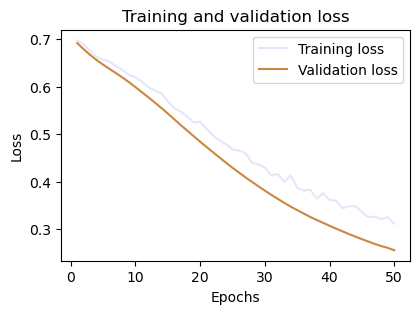

In [39]:
""" Ignore the global size fixed and choose one fig size locally. """
plt.figure(figsize=(4.5, 3))            
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, label='Training loss', color='lavender')       #or...fmt string "y" (-> color=(0.75, 0.75, 0.0, 1))
plt.plot(epochs, val_loss, label='Validation loss', color='peru')     #or...fmt string "r" (-> color=(1.0, 0.0, 0.0, 1))
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

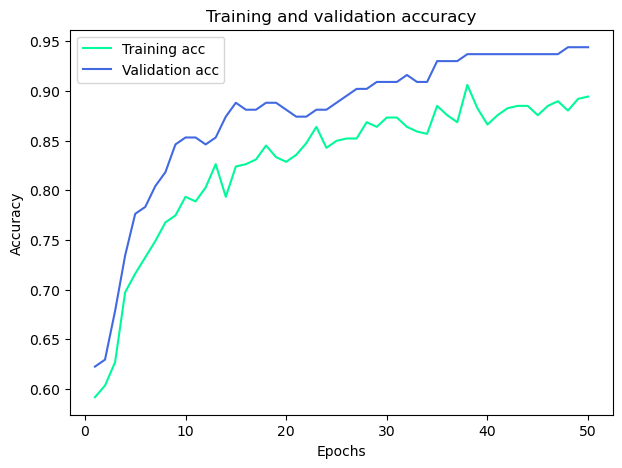

In [38]:
#plt.figure(figsize=(5, 3))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, label='Training acc', color='mediumspringgreen')
plt.plot(epochs, val_acc, label='Validation acc', color='royalblue')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
## Predict the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 2ms/step


<Axes: >

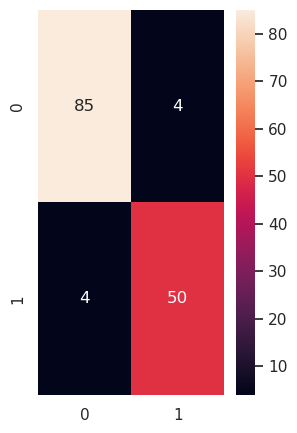

In [45]:
""" Create the Confusion Matrix.
N.B.
Set sizes with seaborn instead of "plt.figure(figsize=(3, 5))"
"""
cm = confusion_matrix(y_test, y_pred)

sns.set(rc={'figure.figsize': (3, 5)})
sns.heatmap(cm, annot=True) #,cmap='Blues')

<h3 style="color:#FF7C00  ">  Simple model selection kfold </h3>

In [47]:
n_splits = 5
# KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

######## Cross validation
for fold, (train_index, val_index) in enumerate(kf.split(X, Y)):
    # Split the data into train and validation sets
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = Y[train_index], Y[val_index]
    
    ####### Define the model
    model = Sequential()
    model.add(Dense(16, input_dim=30, activation='relu')) 
    model.add(Dropout(0.2))
    model.add(Dense(1)) 
    model.add(Activation('sigmoid'))  
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Define the TensorBoard callback
    file_name = 'tensorflow2_saved_model_kfold_{}'.format(fold)
    
    """ Change the way to pass the callback to TensorBoard.\\
    Do not create the writer obj before, use 'with' contruct! """
    #tensorboard = TensorBoard(log_dir="logs/{}".format(file_name), write_graph=True, write_images=True)
    #writer = summary.create_file_writer("logs")
    with summary.create_file_writer("logs/{}".format(file_name)).as_default():
        tensorboard = TensorBoard(log_dir="logs/{}".format(file_name), write_graph=True, write_images=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[tensorboard])
    
    # Evaluate the model on the test set
    _, acc = model.evaluate(X_test, y_test)
    print("Fold {}, Accuracy = {:.2f}%".format(fold, acc * 100.0))

Epoch 1/50
8/8 [==============================] - 1s 40ms/step - loss: 0.7170 - accuracy: 0.3538 - val_loss: 0.7121 - val_accuracy: 0.3684
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.7088 - accuracy: 0.3297 - val_loss: 0.7029 - val_accuracy: 0.3772
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6968 - accuracy: 0.4396 - val_loss: 0.6949 - val_accuracy: 0.4211
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.6866 - accuracy: 0.4747 - val_loss: 0.6872 - val_accuracy: 0.4912
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 0.6839 - accuracy: 0.5407 - val_loss: 0.6795 - val_accuracy: 0.5789
Epoch 6/50
8/8 [==============================] - 0s 22ms/step - loss: 0.6763 - accuracy: 0.6154 - val_loss: 0.6716 - val_accuracy: 0.6930
Epoch 7/50
8/8 [==============================] - 0s 21ms/step - loss: 0.6720 - accuracy: 0.6462 - val_loss: 0.6640 - val_accuracy: 0.8421
Epoch 8/50
8/8 [===========

<h4 style="color:#FF7C00"> => Starting TensorBoard: </h4>

In [48]:
%%script echo Skipping: uncomment to get localhost URL to open Tensorbord. 
#!python -m tensorboard.main --logdir=logs/

2023-07-23 16:21:29.557218: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-23 16:21:30.935925: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.3 at http://localhost:6006/ (Press CTRL+C to quit)
^C
